#Classification using Support Vector Machine Please do not import any other python library except numpy and matplotlib


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
from numpy import linalg as LA

In [0]:
#Generating Random linearly separable data
data = [[np.random.rand(), np.random.rand()] for i in range(10)]
for i, point in enumerate(data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    data[i].append(-1)
  else:
    data[i].append(1)


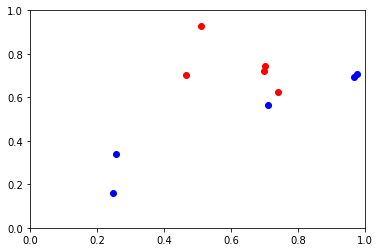

In [30]:
#Visualizing the above data
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(0,1)
  plt.ylim(0,1)

#SVM Classifier Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. 
#You can refer to Fig. 1 in this paper for implementation. You can add arguments to svm_function according to your implementation.


In [0]:
def svm_function(x, y, epoch, l_rate):
    ###################################
    Ones=np.ones((len(x),1))
    x=np.append(x,Ones,axis=1)
    w = np.zeros(len(x[0]))
    for e in range(0,epoch):
      i = random.choice(range(0,len(x)))
      result = y[i]*np.dot(x[i], w)
      if result < 1:
        w = (1-(1/(e+1))) * w + (y[i] * x[i])/(l_rate*(e+1))
      else:
        w = (1-(1/(e+1)))*w
      normt = 1/((np.sqrt(l_rate))*LA.norm(w))
      if normt<1:
        w = w*normt;
    ###################################
    
    return w

In [32]:
#Run SVM Classifier
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]
w = svm_function(X, Y, 10000, 0.01)
print(w)




[-2.54462308  4.63097097 -1.08440204]


#Visualize the classifier Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function 
#and for a line from which actual data was generated (0.5*x - y + 0.25).



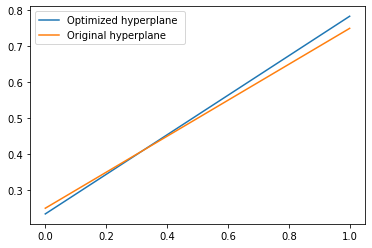

In [33]:
  ###################################
  a =-w[0]/w[1]
  b = -w[2]/w[1]
  xx = np.linspace(0, 1)
  yy =  a * xx + b
  fig = plt.figure()
  ax = plt.subplot(111)
  ax.plot(xx,yy,label='Optimized hyperplane ')
  a1 = 0.5
  b1=0.25
  yy1 =   a1 * xx + b1
  ax.plot(xx,yy1,label='Original hyperplane')
  ax.legend()
  plt.show()
  ###################################

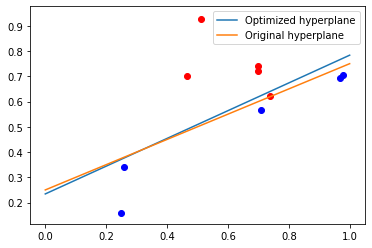

In [34]:
#Visualizing the above data
fig = plt.figure()
ax = plt.subplot(111)
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  ax.scatter(x, y, c=clr)
ax.plot(xx,yy,label='Optimized hyperplane')
ax.plot(xx,yy1,label='Original hyperplane')
ax.legend()

#Increase the number of data-points and observe number of epochs to converge. 
#Draw plots showing data-points, actual data seprating line and line corrosponding to 'w' you got from svm_function for 10, 20, 30, 40, 50 and 100 data-points.
#Please use only one notebook cell for this visualization. Please use subplot function in matplotlib for this.


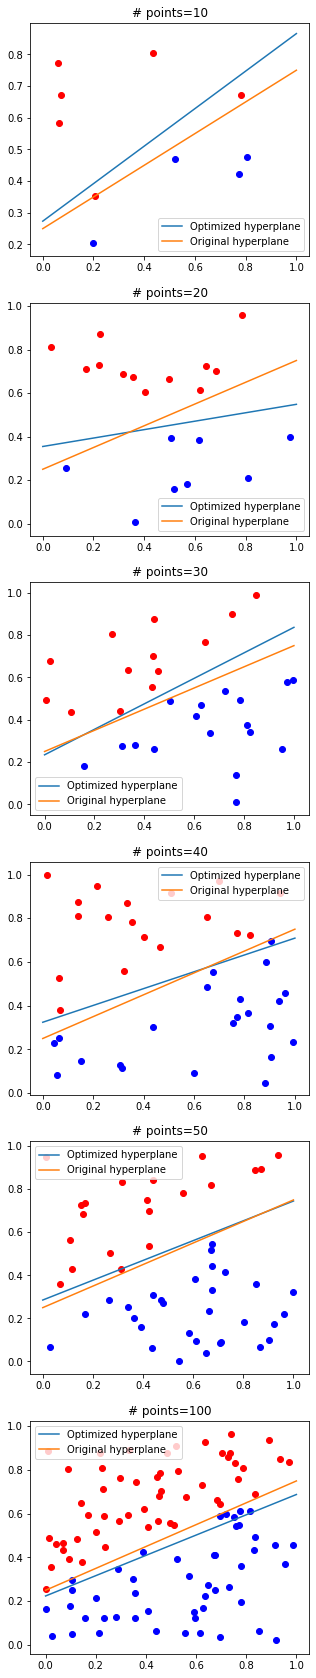

In [37]:
###################################
datapoints = np.array([10,20,30,40,50,100])
fig = plt.figure(figsize=(5,30))
for k in range(0,len(datapoints)):
  #Generating Random linearly separable data
  data1 = [[np.random.rand(), np.random.rand()] for j in range(datapoints[k])]
  for i, point in enumerate(data1):
    x, y = point
    if 0.5*x - y + 0.25 > 0:
      data1[i].append(-1)
    else:
      data1[i].append(1)
  #Run SVM Classifier
  data1 = np.asarray(data1)
  X = data1[:,:2]
  Y = data1[:,2]
  w = svm_function(X, Y, 10000, 0.01)
  #Visualizing the above data and the hyperplane
  a = -w[0]/w[1]
  b = -w[2]/w[1]
  xx = np.linspace(0, 1)
  yy =  a * xx + b
  ax = plt.subplot(6,1, k+1)
  a1 = 0.5
  b1=0.25
  yy1 =   a1 * xx + b1
  ax.plot(xx,yy,label='Optimized hyperplane')
  ax.plot(xx,yy1,label='Original hyperplane')
  ax.title.set_text('# points=' + str(datapoints[k]))
  ax.legend()
  for x, y, l in data1:
    if l == 1:
      clr = 'red'
    else:
      clr = 'blue'
    ax.scatter(x, y, c=clr) 
     
############# Observation #########
# I observed tht incresing the number of 
# epochs will increase the accuracy but 
# the excution time will increase as well      
###################################

In [0]:
#Perturbing the previously created data Add noise to the data and visualize the resulting classifier.
for i in range(len(data)):
  data[i][0] += (np.random.rand() - 0.5) / 2.
  data[i][1] += (np.random.rand() - 0.5) / 2.

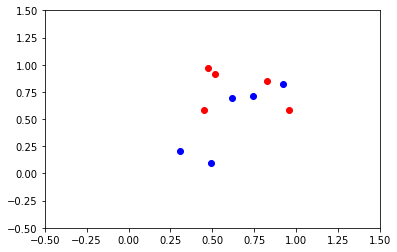

In [39]:
#Visualizing the perturbed Data
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(-0.5,1.5)
  plt.ylim(-0.5,1.5)

#Visualize the classifier trained on noisy data Plot actual seperating line and seperating line you got from svm_classifier.
# Do this for 10, 20, 30, 40, 50 and 100 data points. 
#You can vary the scale of noise as well. Please use only one notebook cell for this visualization. 
#Please use subplot function in matplotlib for this.

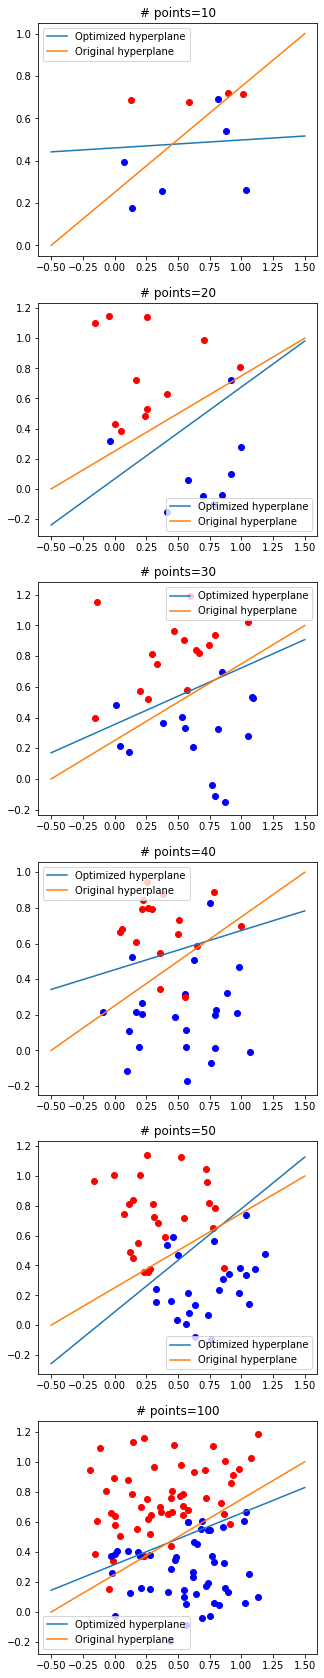

In [40]:
###################################
datapoints = np.array([10,20,30,40,50,100])
fig = plt.figure(figsize=(5,30))
for k in range(0,len(datapoints)):
  #Generating Random linearly separable data
  data2 = [[np.random.rand(), np.random.rand()] for j in range(datapoints[k])]
  for i, point in enumerate(data2):
    x, y = point
    if 0.5*x - y + 0.25 > 0:
      data2[i].append(-1)
    else:
      data2[i].append(1)
  for i in range(len(data2)):
    data2[i][0] += (np.random.rand() - 0.5) / 2.
    data2[i][1] += (np.random.rand() - 0.5) / 2.
  #Run SVM Classifier
  data2 = np.asarray(data2)
  X = data2[:,:2]
  Y = data2[:,2]
  w = svm_function(X, Y, 10000, 0.01)
  #Visualizing the above data and the hyperplane
  a = - w[0]/w[1]
  b = - w[2]/w[1]
  xx = np.linspace(-0.5, 1.5)
  yy =  a * xx + b
  ax = plt.subplot(6,1, k+1)
  ax.plot(xx,yy,label='Optimized hyperplane')
  a1 = 0.5
  b1=0.25
  yy1 =   a1 * xx + b1
  ax.plot(xx,yy1,label='Original hyperplane')
  ax.title.set_text('# points=' + str(datapoints[k]))
  ax.legend()
  for x, y, l in data2:
    if l == 1:
      clr = 'red'
    else:
      clr = 'blue'
    ax.scatter(x, y, c=clr)
    ###################################

#Read the Random Non-linear data stored in CSV1 and visualize it

In [0]:
import csv
import numpy as np 
results = []
with open('/content/csv1.csv','rt')as f:
  data = csv.reader(f)
  for row in data: # each row is a list
        results.append(row)
df1 = np.array(results)
df1 = df1.astype(np.float)




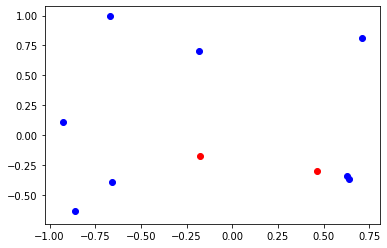

In [42]:

###################################################
for i, point in enumerate(df1):
  point = df1[i][0:2]
  x, y = point
  l = df1[i][2]
  #Visualizing the above data
for x, y, l in df1:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)

###################################################

#Train a SVM classifier on the linearly non-separable data by appropriate features crafted from input data For linearly non-separable data, you need to transform the data in a space where it can be linearly seprable.
# These features can be exponential, polynomial, trignometric or any other function of actual input features. 
#For example, if your input data is (x1, x2) you can have hand-crafted features as (sin(x1), cos(x1), cos(x2), x1-x2).
# Here you need to think of which hand-crafted features can be best suited for data given to you. 
#Write a function to convert input features to hand-crafted features. Use these features to train a SVM using svm_function.
# Note that, if you choose to have L hand-crafted features, SVM will return L+1 dimensional 'w'. 

In [0]:
############## Kernels ###################
def Gaussian_kernel(x, mean1, mean2, var1, var2 ):
  num_fetures=2
  size = (len(x) , num_fetures)
  F = np.zeros(size)
  for i in range(0,len(x)):
    F[i,0] = np.exp(-(((x[i,0]-mean1[0])**2) + ((x[i,1]-mean1[1])**2))/(var1))
    F[i,1] = np.exp(-(((x[i,0]-mean2[0])**2) + ((x[i,1]-mean2[1])**2))/(var2))
  return F

def Gaussian_kernel3d(x, mean1, mean2, mean3,  var1, var2, var3 ):
  num_fetures=3
  size = (len(x) , num_fetures)
  F = np.zeros(size)
  for i in range(0,len(x)):
    F[i,0] = np.exp(-(((x[i,0]-mean1[0])**2) + ((x[i,1]-mean1[1])**2))/(var1))
    F[i,1] = np.exp(-(((x[i,0]-mean2[0])**2) + ((x[i,1]-mean2[1])**2))/(var2))
    F[i,1] = np.exp(-(((x[i,0]-mean3[0])**2) + ((x[i,1]-mean3[1])**2))/(var3))
           
  return F

def polynomial_kernel(x):
  num_fetures = 4
  size = (len(x) , num_fetures)
  F = np.zeros(size)
  for i in range(0,len(x)):
    x1 = x[i,0]
    x2 = x[i,1]
    f1 = 1
    f2 = x1
    f3 = x2
    f4 = x1*x1
    f5 = x2*x2
    f6 = x1*x2
    F[i,:] = [f1, f2, f3, f4, f5, f6]
    #F[i,:] = [f1, f2, f3, f6]
  return F

def Second_Order_Kernel(x):
  num_fetures = 3
  size = (len(x) , num_fetures)
  F = np.zeros(size)
  for i in range(0,len(x)):
    x1 = x[i,0]
    x2 = x[i,1]
    f1 = x1**2
    f2 = np.sqrt(2) * x1 * x2
    f3 = x2**2
    F[i,:] = [f1, f2, f3]
  return F

def Sigmoid_Kernel(x):
  num_fetures = 2
  size = (len(x) , num_fetures)
  F = np.zeros(size)
  for i in range(0,len(x)):
    x1 = x[i,0]
    x2 = x[i,1]
    f1 = 1/(1+np.exp(-x1)) 
    f2 = 1/(1+np.exp(-x2))
    F[i,:] = [f1, f2]
  return F

def Triangular_Kernel(x):
  num_fetures = 3
  size = (len(x) , num_fetures)
  F = np.zeros(size)
  for i in range(0,len(x)):
    x1 = x[i,0]
    x2 = x[i,1]
    f1 = np.cos(x1)
    f2 = np.cos(x2)
    f3 = np.sin(x1) 
    F[i,:] = [f1, f2, f3]
  return F
#####################################################




In [0]:
################################################
X = df1[:,:2]
Y = df1[:,2]
#F = Gaussian_kernel(X, np.array([-0.2,-0.15]), np.array([0.4, -0.25]), 0.5, 0.25 )
#F = Gaussian_kernel(X, np.array([0.15,-0.25]), np.array([-0.5, 0.5]), 0.5, 0.5 )
F = Gaussian_kernel(X, np.array([0.15,-0.25]), np.array([-0.25, 0.5]), 0.5, 0.9)
#F = Sigmoid_Kernel(X)
################################################


######################################################
#Run SVM Classifier
w = svm_function(F, Y, 10000, 0.01)
######################################################

#Visualize decision boundary Here, as 'w' retuened by svm_function is (L+1) dimensional, you can not visualize it in the form of line in 2D. 
#To visualize non-linear decision boundary in 2D, you can generate few hundred random data-points and can observe if classifier labels them +1 or -1.
# Then you can plot this points with different colors to get emperical decision boundary. Write the code for visualization of non-linear decision boundary in next cell.


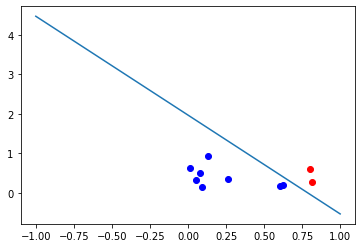

In [45]:
Y = Y.reshape((len(F),1))
F=np.append(F,Y,axis=1)
# visualizing the extracted features
for x, y, l in F:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  #Visualizing the above data and the hyperplane
a = - w[0]/w[1]
b = - w[2]/w[1]
xx = np.linspace(-1, 1)
yy =  a * xx + b
plt.plot(xx,yy)

  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


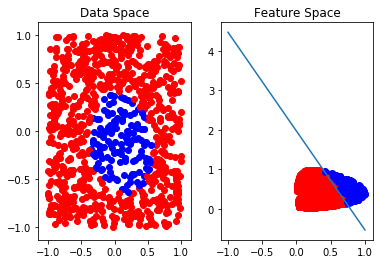

In [46]:
###################################
#Generating Random linearly separable data
import random
#data_new = [[np.random.rand(), np.random.rand()] for i in range(1000)]
data_new = [[random.random() * 2 - 1, random.random() * 2 - 1] for i in range(900)]
X = np.array(data_new)
Y = np.ones((len(X),1))
fig = plt.figure()
#F = Gaussian_kernel(X, np.array([-0.2,-0.15]), np.array([0.4, -0.25]), 0.5, 0.25 )
#F = Gaussian_kernel(X, np.array([0.15,-0.25]), np.array([-0.5, 0.5]), 0.5, 0.5 )
F = Gaussian_kernel(X, np.array([0.15,-0.25]), np.array([-0.25, 0.5]), 0.5, 0.8 )
#F = Sigmoid_Kernel(X)
#Using the weights we got from training the classifier to predict the sign of the randomly generated data
Ones=np.ones((len(F),1))
F_new=np.append(F,Ones,axis=1)
X_new = np.append(X,Ones,axis=1)
w = np.reshape(w, (len(w),1))
F_new = np.reshape(F_new, (len(F_new),len(w)))
#F_new = F
for i, point in enumerate(F_new):
  if np.dot(F_new[i,:],w[:]) > 0:
    X_new[i,-1] = -1
  else:
    X_new[i,-1] = 1
#Visualizing the above data in the data space
for x, y, l in X_new:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  ax = plt.subplot(1, 2, 1)
  ax.scatter(x,y,c=clr)
  ax.title.set_text('Data Space')
# Visualizing separating data in feature space
Y = X_new[:,-1]
Y = Y.reshape((len(F),1))
F=np.append(F,Y,axis=1)
# visualizing the extracted features
for x, y, l in F:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  ax = plt.subplot(1, 2, 2)
  ax.scatter(x, y, c=clr)
  ax.title.set_text('Feature Space')
  #Visualizing the above data and the hyperplane
a = - w[0]/w[1]
b = - w[2]/w[1]
xx = np.linspace(-1, 1)
yy =  a * xx + b
ax.plot(xx,yy)

###################################

#Read the Random Non-linear data stored in CSV2

In [0]:
import csv
import numpy as np 
results = []
with open('/content/csv2.csv','rt')as f:
  data = csv.reader(f)
  for row in data: # each row is a list
        results.append(row)
df2 = np.array(results)
df2 = df2.astype(np.float)

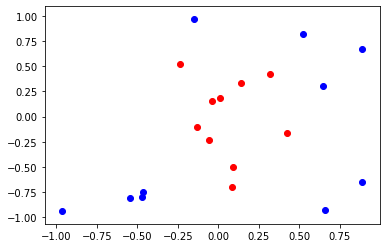

In [48]:
###################################################
for i, point in enumerate(df2):
  point = df2[i][0:2]
  x, y = point
  l = df2[i][2]
  #Visualizing the above data
for x, y, l in df2:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
####################################################

#Train a SVM classifier on the non linear data by appropriate features and also visualise it

In [0]:
###################################
X = df2[:,:2]
Y = df2[:,2]
#F = Gaussian_kernel3d(X, np.array([0.15,0.0]), np.array([-0.5,-0.5]),np.array([0.75,0.75]), 0.5, 0.5, 0.5 )
#F = Sigmoid_Kernel(X)
#F = Second_Order_Kernel(X)
F = Triangular_Kernel(X)



#Run SVM Classifier
w = svm_function(F, Y, 10000, 0.01)


###################################

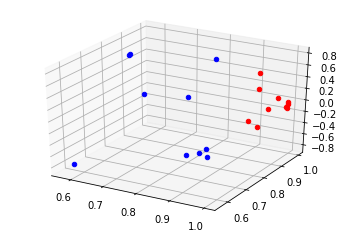

In [50]:
# This import registers the 3D projection
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Y = Y.reshape((len(F),1))
F=np.append(F,Y,axis=1)
#Visualizing the above data
for x, y,z, l in F:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  ax.scatter(x, y,z, c=clr)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


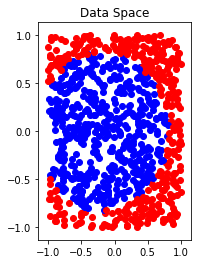

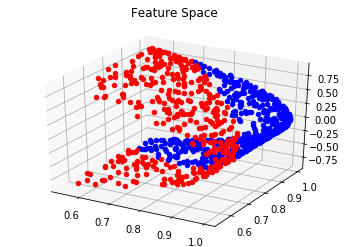

In [51]:
###################################
#Generating Random linearly separable data
import random
#data_new = [[np.random.rand(), np.random.rand()] for i in range(1000)]
data_new = [[random.random() * 2 - 1, random.random() * 2 - 1] for i in range(900)]
X = np.array(data_new)
Y = np.ones((len(X),1))
fig = plt.figure()
F = Second_Order_Kernel(X)
F = Triangular_Kernel(X)
#F = Gaussian_kernel3d(X, np.array([0.15,0.0]), np.array([-0.5,-0.5]),np.array([0.75,0.75]), 0.5, 0.5, 0.5 )
#Using the weights we got from training the classifier to predict the sign of the randomly generated data
Ones=np.ones((len(F),1))
F_new=np.append(F,Ones,axis=1)
X_new = np.append(X,Ones,axis=1)
w = np.reshape(w, (len(w),1))
F_new = np.reshape(F_new, (len(F_new),len(w)))
#F_new = F
for i, point in enumerate(F_new):
  if np.dot(F_new[i,:],w[:]) > 0:
    X_new[i,-1] = -1
  else:
    X_new[i,-1] = 1
#Visualizing the above data in the data space
for x, y, l in X_new:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  ax = plt.subplot(1, 2, 1)
  ax.scatter(x,y,c=clr)
  ax.title.set_text('Data Space')
# Visualizing separating data in feature space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Y = X_new[:,-1]
Y = Y.reshape((len(F),1))
F=np.append(F,Y,axis=1)
#Visualizing the above data
for x, y,z, l in F:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  ax.scatter(x, y,z, c=clr)
  ax.title.set_text('Feature Space')
###################################

#Read the Random Non-linear data stored in CSV3


In [0]:
import csv
results = []
with open('/content/csv3.csv','rt')as f:
  data = csv.reader(f)
  for row in data: # each row is a list
        results.append(row)
df3 = np.array(results)
df3 = df3.astype(np.float)

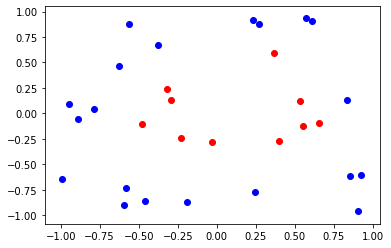

In [53]:
###################################################
for i, point in enumerate(df3):
  point = df3[i][0:2]
  x, y = point
  l = df3[i][2]
  #Visualizing the above data
for x, y, l in df3:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)

####################################################

#Train a SVM classifier on the non linear data by appropriate Feature Engineering and also visualise it


In [0]:
###################################
X = df3[:,:2]
Y = df3[:,2]
F = Gaussian_kernel3d(X, np.array([0.15,0.0]), np.array([-0.75,-0.75]),np.array([0.75,0.75]), 0.5, 0.5, 0.5 )
#F = Sigmoid_Kernel(X)
#F = Second_Order_Kernel(X)
#F = Triangular_Kernel(X)



#Run SVM Classifier
w = svm_function(F, Y, 10000, 0.01)


###################################

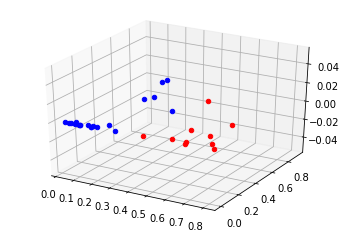

In [55]:
# This import registers the 3D projection
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Y = Y.reshape((len(F),1))
F=np.append(F,Y,axis=1)
#Visualizing the above data
for x, y,z, l in F:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  ax.scatter(x, y,z, c=clr)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


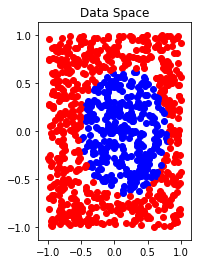

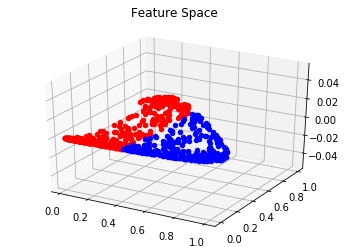

In [27]:
###################################
#Generating Random linearly separable data
import random
#data_new = [[np.random.rand(), np.random.rand()] for i in range(1000)]
data_new = [[random.random() * 2 - 1, random.random() * 2 - 1] for i in range(900)]
X = np.array(data_new)
Y = np.ones((len(X),1))
fig = plt.figure()
#F = Second_Order_Kernel(X)
F = Gaussian_kernel3d(X, np.array([0.15,0.0]), np.array([-0.75,-0.75]),np.array([0.75,0.75]), 0.5, 0.5, 0.5 )
#F = Triangular_Kernel(X)
#Using the weights we got from training the classifier to predict the sign of the randomly generated data
Ones=np.ones((len(F),1))
F_new=np.append(F,Ones,axis=1)
X_new = np.append(X,Ones,axis=1)
w = np.reshape(w, (len(w),1))
F_new = np.reshape(F_new, (len(F_new),len(w)))
#F_new = F
for i, point in enumerate(F_new):
  if np.dot(F_new[i,:],w[:]) > 0:
    X_new[i,-1] = -1
  else:
    X_new[i,-1] = 1
#Visualizing the above data in the data space
for x, y, l in X_new:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  ax = plt.subplot(1, 2, 1)
  ax.scatter(x,y,c=clr)
  ax.title.set_text('Data Space')
# Visualizing separating data in feature space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Y = X_new[:,-1]
Y = Y.reshape((len(F),1))
F=np.append(F,Y,axis=1)
#Visualizing the above data
for x, y,z, l in F:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  ax.scatter(x, y,z, c=clr)
  ax.title.set_text('Feature Space')
###################################